In [132]:
import torch
import torch.nn as nn
# import pandas as pd

import sys
sys.path.append('../')
from HGP.models import LightModel
from GCN.models import LightModel as LightModel_GCN
import pickle

In [111]:
args_dict = take_hp(f"../log/emp-hgp-coil/emp-hgp-coil-grid{1:03d}.yml")
pl.seed_everything(args_dict["random_seed"], workers=True)

# Load the model 
model = LightModel_GCN(args_dict).to(args_dict["device"])
model.eval()
model.freeze()
model.load_state_dict(torch.load(f"../model/emp-hgp-coil-grid/model_{i}.pt"))

Global seed set to 21


<All keys matched successfully>

In [13]:
import networkx as nx

In [14]:
from utils.imports import *
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.profilers import SimpleProfiler

# BITTE EINMAL DEN MODELL NAMEN HIER EINMAL EINTRAGEN (HGP-SL o.ä.)

Damit die Datei unter dem Namen gespeichert wird

In [16]:
# %%
args_dict = take_hp("../log/emp-hgp-nci/emp-gcn-nci-grid001.yml")

# pl.seed_everything(args_dict["random_seed"], workers=True)


In [17]:
# %%
# Load the dataset
dataset = TUDataset(
    Path.cwd().joinpath("../data"),
    name=args_dict["dataset"],
    use_node_attr=True,
)
args_dict["num_classes"] = dataset.num_classes
args_dict["num_features"] = dataset.num_features

In [18]:
split_train = int(dataset.len() * args_dict["split_ratio"])
split_val = int((dataset.len() - split_train) * args_dict["test_ratio"])
split_test = dataset.len() - split_val - split_train

print(
    f"Hole: {dataset.len()}, Train: {split_train}, Val: {split_val}, Test: {split_test}"
)
# %%
train_data, eval_data, test_data = random_split(
    dataset,
    [split_train, split_val, split_test],
    generator=torch.Generator().manual_seed(42),
)

Hole: 4110, Train: 2055, Val: 1027, Test: 1028


In [121]:
# %%
train_loader = DataLoader(
    train_data,
    batch_size=args_dict["batch_size"],
    shuffle=False,
    num_workers=args_dict["num_workers"],
)
val_loader = DataLoader(
    eval_data,
    batch_size=args_dict["batch_size"],
    shuffle=False,
    num_workers=args_dict["num_workers"],
)
test_loader = DataLoader(
    test_data,
    batch_size= 1 ,# dataset.len() - split_test,
    shuffle=False,
    num_workers=args_dict["num_workers"],
)

In [122]:
name = "hgp"

In [125]:
# Loop over all models in the model/emp-enzym-equal folder
# and classify the graphs
loss = nn.CrossEntropyLoss(reduction="none")
softmax = nn.Softmax(dim=1)
Path(f"../analysis/{args_dict['architecture']}/{args_dict['dataset']}").mkdir(parents=True, exist_ok=True)

# Get model and config paths
model_paths = Path.cwd().joinpath(f"../model/emp-{name}-grid").iterdir()
log_paths = Path.cwd().joinpath(f"../log/emp-{name}").iterdir()

for i in range(54):
    # Load the config file
    args_dict = take_hp(f"../log/emp-{name}-nci/emp-{name}-nci-grid{i+1:03d}.yml")
    pl.seed_everything(args_dict["random_seed"], workers=True)

    # Load the model 
    model = LightModel(args_dict).to(args_dict["device"])
    model.eval()
    model.freeze()
    model.load_state_dict(torch.load(f"../model/emp-{name}-nci-grid/model_{i}.pt"))

    # Reset Variables
    graph_ids = []
    graphs = []
    counter = 0

    for batch in test_loader:
        data = batch.to(args_dict["device"])
        out = model(data)
        prediction_truth = np.argmax(softmax(out).detach().cpu().numpy()) == data.y.detach().cpu().numpy()
        
        graph_dict = {
            "model_id": f"{i}",
            "random_seed": f"{args_dict['random_seed']}",
            "dropout_ratio": f"{args_dict['dropout_ratio']}",
            "pooling_ratio": f"{args_dict['pooling_ratio']}",
            "structure_learning": f"{args_dict['structure_learning']}",	
            "graph_id": f"{counter}",
            "prediction": f"{np.argmax(softmax(out).detach().cpu().numpy())}",
            "label": f"{data.y.detach().cpu().numpy()[0]}",
            "correct": f"{prediction_truth[0]}",
            "softmax": nn.Softmax(dim=1)(out).detach().cpu().numpy()[0][data.y.detach().cpu().numpy()[0]],
            "sigmod": nn.Sigmoid()(out).detach().cpu().numpy()[0][data.y.detach().cpu().numpy()[0]],
            "loss": loss(out, data.y).detach().cpu().numpy()[0]
        }
        
        g = nx.from_edgelist(data.edge_index.cpu().numpy().T)
        g.graph.update(graph_dict)
        print(g.graph["pooling_ratio"])
        graphs.append(g)
        counter += 1
    print("stop")
    break
    np_graphs = np.array(graphs, dtype=object)
    np.save(f"../analysis/{args_dict['architecture']}/{args_dict['dataset']}/graphs_{i}.npy", np_graphs)

Global seed set to 21


0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1


KeyboardInterrupt: 

In [112]:
for batch in test_loader:
    print(2)

2


In [26]:
split_test

1028

In [167]:
metric_test_loader = DataLoader(
    test_data,
    batch_size= 1028 ,# dataset.len() - split_test,
    shuffle=False,
    num_workers=args_dict["num_workers"],
)

In [35]:
from torchmetrics import F1Score, Precision, Recall, Accuracy

In [37]:
for batch in metric_test_loader:
    data = batch.to(args_dict["device"])
    out = model(data)
    f1 = F1Score(num_classes=dataset.num_classes).to(args_dict["device"])(out, data.y)
    pr = Precision(num_classes=dataset.num_classes).to(args_dict["device"])(out, data.y)
    re = Recall(num_classes=dataset.num_classes).to(args_dict["device"])(out, data.y)
    ac = Accuracy(num_classes=dataset.num_classes).to(args_dict["device"])(out, data.y)
    print(f1, pr, re, ac)
    

tensor(0.6479, device='cuda:0') tensor(0.6479, device='cuda:0') tensor(0.6479, device='cuda:0') tensor(0.6479, device='cuda:0')


In [38]:
dataset.num_classes

2

In [165]:
def index_func(seed):
    if seed == 21:
        return 0
    if seed == 2021:
        return 1
    if seed == 1337:
        return 2
    else:
        assert False

In [218]:
dic = {
        0:-1,
        1:-1,
        2:-1
    }
def get_i(index):
    dic[index] = dic[index] + 1
    return dic[index]

In [219]:
# Loop over all models in the model/emp-enzym-equal folder
# and classify the graphs
Path(f"../analysis/{args_dict['architecture']}/{args_dict['dataset']}").mkdir(parents=True, exist_ok=True)
name = "gcn"
# Get model and config paths
model_paths = Path.cwd().joinpath(f"../model/emp-{name}-grid").iterdir()
#log_paths = Path.cwd().joinpath(f"../log/{name}-hgp-nci").iterdir()
#args_dict = take_hp(f"../log/emp-{name}-nci/emp-{name}-nci-grid001.yml")
# numpy array to store the results
results = np.zeros((3, 9, 5))
i = 0
for x in range(54):
    # Load the config file
    args_dict = take_hp(f"../log/emp-{name}-nci/emp-{name}-nci-grid{x+1:03d}.yml")
    if not args_dict["structure_learning"]:
        # Load the model 
        index = index_func(args_dict["random_seed"])
        
        model = LightModel_GCN(args_dict).to(args_dict["device"])
        model.eval()
        model.freeze()
        model.load_state_dict(torch.load(f"../model/emp-{name}-nci-grid/model_{x}.pt"))

        for batch in metric_test_loader:

            data = batch.to(args_dict["device"])
            out = model(data)
            micro = F1Score(num_classes=dataset.num_classes, average="micro").to(args_dict["device"])(out, data.y)

            f1 = F1Score(num_classes=dataset.num_classes, average='macro').to(args_dict["device"])(out, data.y)
            pr = Precision(num_classes=dataset.num_classes, average='macro').to(args_dict["device"])(out, data.y)
            re = Recall(num_classes=dataset.num_classes, average='macro').to(args_dict["device"])(out, data.y)
            ac = Accuracy(num_classes=dataset.num_classes, average='macro').to(args_dict["device"])(out, data.y)

            i = get_i(index)
            
            results[index, i, 0] = f1
            results[index, i, 1] = pr
            results[index, i, 2] = re
            results[index, i, 3] = ac
            results[index, i, 4] = micro
    
np.save(f"../analysis/{name}_metrics.npy", results)

In [126]:
import matplotlib.pyplot as plt

In [220]:
results_gcn = np.load("../analysis/gcn_metrics.npy")

In [221]:
results_hgp = np.load("../analysis/hgp_metrics.npy")

In [222]:
results_hgpsl = np.load("../analysis/hgpsl_metrics.npy")

In [241]:
macro_hgp_mean = np.mean(results_hgp, axis=0)[:,0]
macro_hgp_std = np.std(results_hgp, axis=0)[:,0]
sort = np.argsort(macro_hgp_mean)
macro_hgp_mean = macro_hgp_mean[sort]
macro_hgp_std = macro_hgp_std[sort]

In [247]:
macro_hgpsl_mean = np.mean(results_hgpsl, axis=0)[:,0]
macro_hgpsl_std = np.std(results_hgpsl, axis=0)[:,0]
sort = np.argsort(macro_hgpsl_mean)
macro_hgpsl_mean = macro_hgpsl_mean[sort]
macro_hgpsl_std = macro_hgpsl_std[sort]

In [248]:
macro_gcn_mean = np.mean(results_gcn, axis=0)[:,0]
macro_gcn_std = np.std(results_gcn, axis=0)[:,0]
sort = np.argsort(macro_gcn_mean)
macro_gcn_mean = macro_gcn_mean[sort]
macro_gcn_std = macro_gcn_std[sort]

In [257]:
from matplotlib.transforms import Affine2D

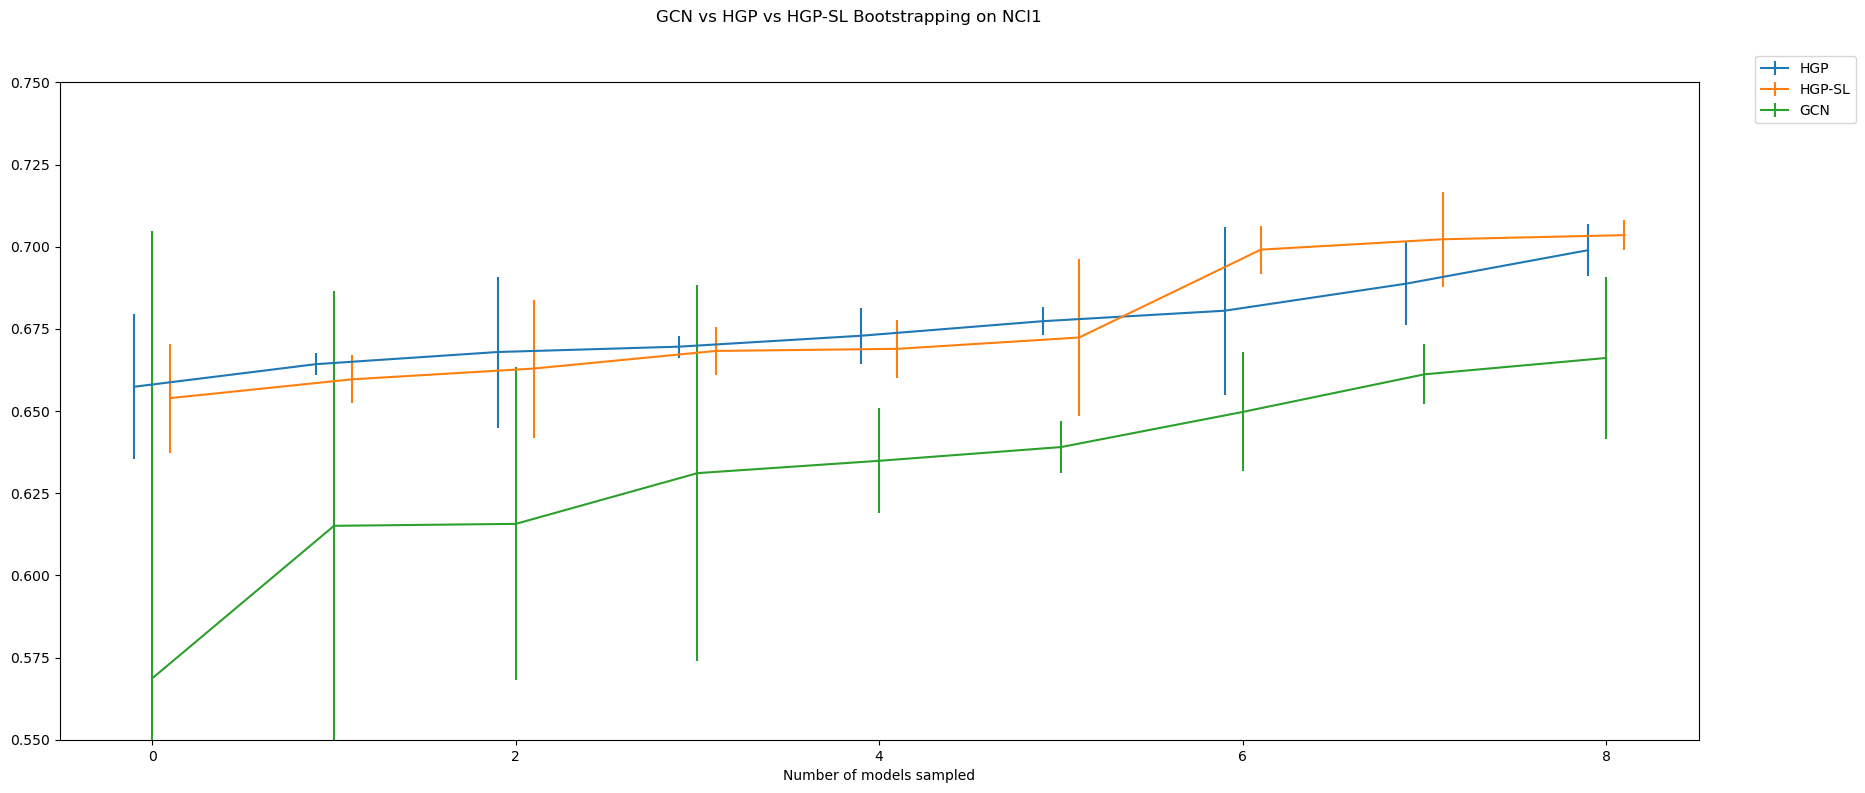

In [259]:
fig, ax1 = plt.subplots(1, sharex=True, sharey=True)
fig.suptitle('GCN vs HGP vs HGP-SL Bootstrapping on NCI1')
plt.xlabel("Number of models sampled")
fig.tight_layout()
fig.set_size_inches(18.5, 8.5)
plt.ylim((0.55, 0.75))

trans1 = Affine2D().translate(-0.1, 0.0) + ax1.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax1.transData
trans3 = Affine2D().translate(+0.0, 0.0) + ax1.transData

ax1.errorbar(np.arange(9), macro_hgp_mean, yerr=macro_hgp_std, transform=trans1, label='HGP')
ax1.errorbar(np.arange(9), macro_hgpsl_mean, yerr=macro_hgpsl_std, transform=trans2, label='HGP-SL')
ax1.errorbar(np.arange(9), macro_gcn_mean, yerr=macro_gcn_std, transform=trans3, label='GCN')

ax1.legend(bbox_to_anchor=(1.1, 1.05))
for ax in fig.get_axes():
    ax.label_outer()

In [143]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_data_hgp = np.zeros((9, 3, 5, 2))
plot_data_hgpsl = np.zeros((9, 3, 5, 2))
plot_data_gcn = np.zeros((9, 3, 5, 2))
for i, (_,_,_) in enumerate(zip(plot_data_hgp, plot_data_hgpsl, plot_data_gcn)):

    sample_f1 = np.random.choice(np.mean(results_hgp, axis=0)[:,0], i, replace=False)
    sample_pr = np.random.choice(np.mean(results_hgp, axis=0)[:,1], i, replace=False)
    sample_re = np.random.choice(np.mean(results_hgp, axis=0)[:,2], i, replace=False)
    sample_ac = np.random.choice(np.mean(results_hgp, axis=0)[:,3], i, replace=False)
    sample_mi = np.random.choice(np.mean(results_hgp, axis=0)[:,4], i, replace=False)

    plot_data_hgp[i, 0, 0] = np.mean(sample_f1)
    plot_data_hgp[i, 0, 1] = np.std(sample_f1)
    plot_data_hgp[i, 1, 0] = np.mean(sample_pr)
    plot_data_hgp[i, 1, 1] = np.std(sample_pr)
    plot_data_hgp[i, 2, 0] = np.mean(sample_re)
    plot_data_hgp[i, 2, 1] = np.std(sample_re)
    plot_data_hgp[i, 3, 0] = np.mean(sample_ac)
    plot_data_hgp[i, 3, 1] = np.std(sample_ac)
    plot_data_hgp[i, 4, 0] = np.mean(sample_mi)
    plot_data_hgp[i, 4, 1] = np.std(sample_mi)

    sample_f1 = np.random.choice(np.mean(results_hgpsl, axis=0)[:,0], i, replace=False)
    sample_pr = np.random.choice(np.mean(results_hgpsl, axis=0)[:,0], i, replace=False)
    sample_re = np.random.choice(np.mean(results_hgpsl, axis=0)[:,0], i, replace=False)
    sample_ac = np.random.choice(np.mean(results_hgpsl, axis=0)[:,0], i, replace=False)
    sample_mi = np.random.choice(np.mean(results_hgpsl, axis=0)[:,0], i, replace=False)

    plot_data_hgpsl[i, 0, 0] = np.mean(sample_f1)
    plot_data_hgpsl[i, 0, 1] = np.std(sample_f1)
    plot_data_hgpsl[i, 1, 0] = np.mean(sample_pr)
    plot_data_hgpsl[i, 1, 1] = np.std(sample_pr)
    plot_data_hgpsl[i, 2, 0] = np.mean(sample_re)
    plot_data_hgpsl[i, 2, 1] = np.std(sample_re)
    plot_data_hgpsl[i, 3, 0] = np.mean(sample_ac)
    plot_data_hgpsl[i, 3, 1] = np.std(sample_ac)
    plot_data_hgpsl[i, 4, 0] = np.mean(sample_mi)
    plot_data_hgpsl[i, 4, 1] = np.std(sample_mi)

    sample_f1 = np.random.choice(results_gcn[:,0], i, replace=False)
    sample_pr = np.random.choice(results_gcn[:,1], i, replace=False)
    sample_re = np.random.choice(results_gcn[:,2], i, replace=False)
    sample_ac = np.random.choice(results_gcn[:,3], i, replace=False)
    sample_mi = np.random.choice(results_gcn[:,4], i, replace=False)

    plot_data_gcn[i, 0, 0] = np.mean(sample_f1)
    plot_data_gcn[i, 0, 1] = np.std(sample_f1)
    plot_data_gcn[i, 1, 0] = np.mean(sample_pr)
    plot_data_gcn[i, 1, 1] = np.std(sample_pr)
    plot_data_gcn[i, 2, 0] = np.mean(sample_re)
    plot_data_gcn[i, 2, 1] = np.std(sample_re)
    plot_data_gcn[i, 3, 0] = np.mean(sample_ac)
    plot_data_gcn[i, 3, 1] = np.std(sample_ac)
    plot_data_gcn[i, 4, 0] = np.mean(sample_mi)
    plot_data_gcn[i, 4, 1] = np.std(sample_mi)
    

/home/bjoern/miniconda3/envs/HGL/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bjoern/miniconda3/envs/HGL/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bjoern/miniconda3/envs/HGL/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bjoern/miniconda3/envs/HGL/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/bjoern/miniconda3/envs/HGL/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


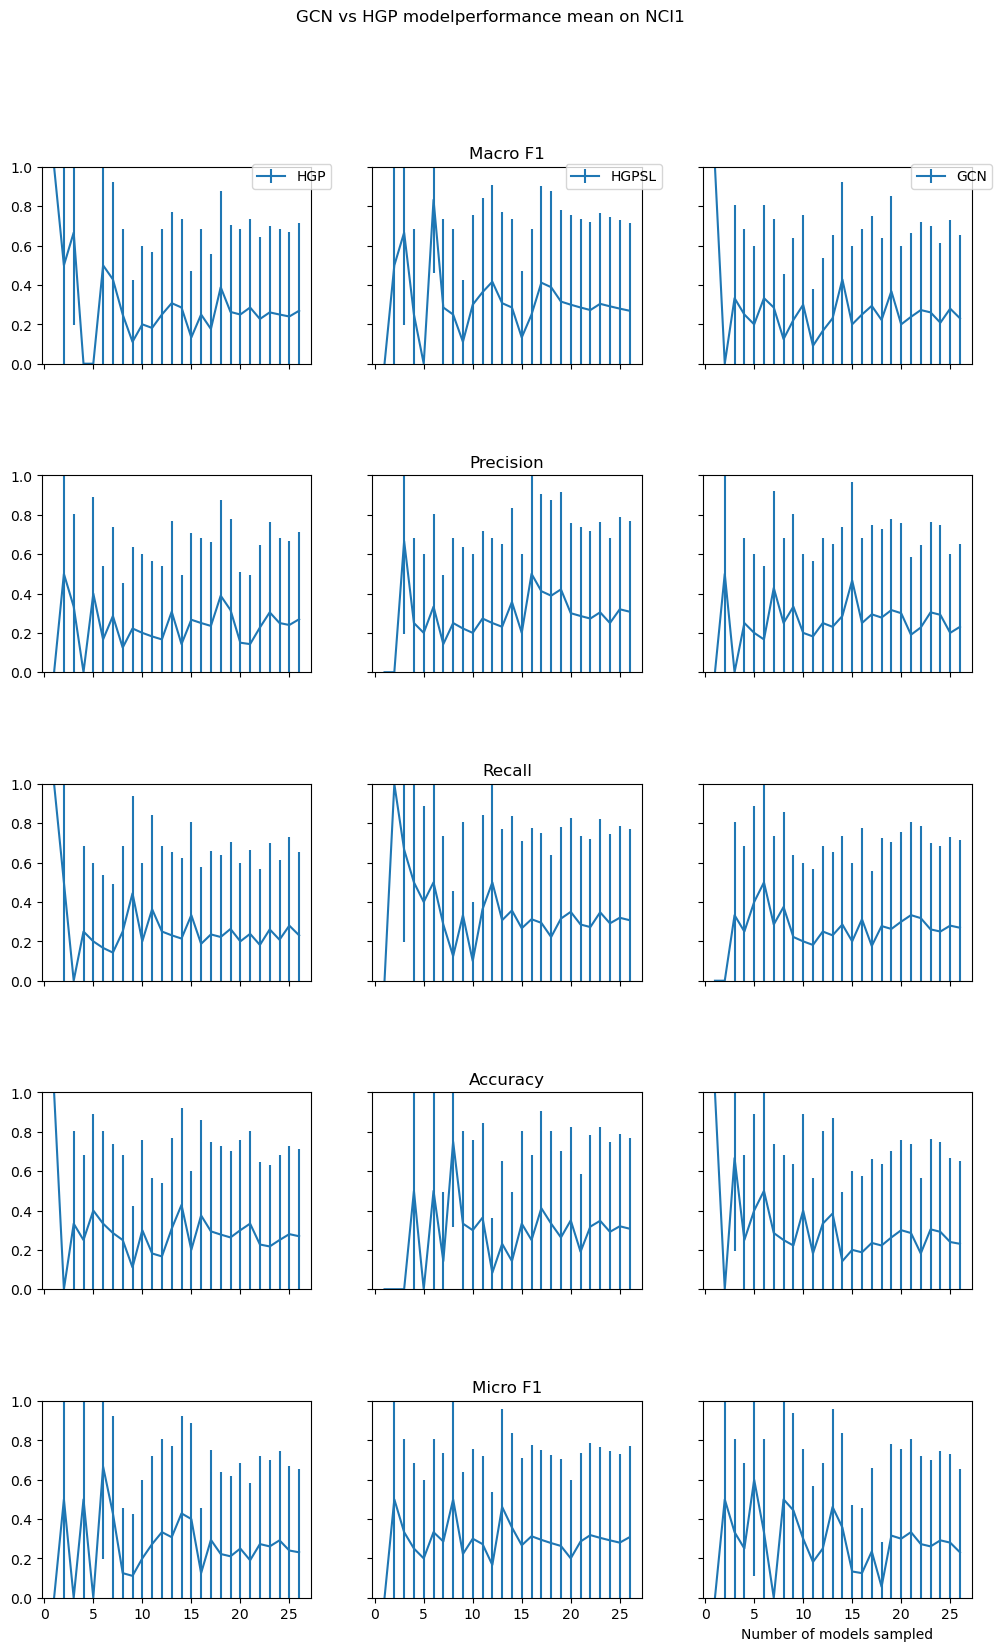

In [152]:
fig, ((ax11,ax12,ax13), (ax21,ax22,ax23), (ax31,ax32,ax33), (ax41,ax42,ax43), (ax51,ax52,ax53)) = plt.subplots(5,3, sharex=True, sharey=True)
fig.suptitle('GCN vs HGP modelperformance mean on NCI1')
plt.xlabel("Number of models sampled")
fig.tight_layout()
fig.set_size_inches(10.5, 18.5)
plt.ylim((0.00, 1.00))
ax11.errorbar(np.arange(27), plot_data_hgp[:,0,0], yerr=plot_data_hgp[:,0,1], label='HGP')
ax12.errorbar(np.arange(27), plot_data_hgpsl[:,0,0], yerr=plot_data_hgpsl[:,0,1], label='HGPSL')
ax13.errorbar(np.arange(27), plot_data_gcn[:,0,0], yerr=plot_data_gcn[:,0,1], label='GCN')
ax11.legend(bbox_to_anchor=(1.1, 1.05))
ax12.legend(bbox_to_anchor=(1.1, 1.05))
ax13.legend(bbox_to_anchor=(1.1, 1.05))
ax12.set_title('Macro F1')	
ax21.errorbar(np.arange(27), plot_data_hgp[:,1,0], yerr=plot_data_hgp[:,1,1])
ax22.errorbar(np.arange(27), plot_data_hgpsl[:,1,0], yerr=plot_data_hgpsl[:,1,1])
ax23.errorbar(np.arange(27), plot_data_gcn[:,1,0], yerr=plot_data_gcn[:,1,1])
ax22.set_title('Precision')
ax31.errorbar(np.arange(27), plot_data_hgp[:,2,0], yerr=plot_data_hgp[:,2,1])
ax32.errorbar(np.arange(27), plot_data_hgpsl[:,2,0], yerr=plot_data_hgpsl[:,2,1])
ax33.errorbar(np.arange(27), plot_data_gcn[:,2,0], yerr=plot_data_gcn[:,2,1])
ax32.set_title('Recall')
ax41.errorbar(np.arange(27), plot_data_hgp[:,3,0], yerr=plot_data_hgp[:,3,1])
ax42.errorbar(np.arange(27), plot_data_hgpsl[:,3,0], yerr=plot_data_hgpsl[:,3,1])
ax43.errorbar(np.arange(27), plot_data_gcn[:,3,0], yerr=plot_data_gcn[:,3,1])
ax42.set_title('Accuracy')
ax51.errorbar(np.arange(27), plot_data_hgp[:,4,0], yerr=plot_data_hgp[:,4,1])
ax52.errorbar(np.arange(27), plot_data_hgpsl[:,4,0], yerr=plot_data_hgpsl[:,4,1])
ax53.errorbar(np.arange(27), plot_data_gcn[:,4,0], yerr=plot_data_gcn[:,4,1])
ax52.set_title('Micro F1')

for ax in fig.get_axes():
    ax.label_outer()

In [74]:
plot_data[:,0,0]

array([       nan, 0.68978775, 0.68554667, 0.69325187, 0.67287995,
       0.6794186 , 0.68803077, 0.6661897 , 0.68182625, 0.68724518,
       0.6726559 , 0.67727137, 0.6772039 , 0.67519866, 0.67392993,
       0.67670177, 0.67524564, 0.67421897, 0.67167842, 0.67526691,
       0.67656932, 0.66814513, 0.6766818 , 0.67009004, 0.67547784,
       0.67626314, 0.67645149, 0.6710226 , 0.67357443, 0.67015235,
       0.67968742, 0.67885318, 0.67417639, 0.67808572, 0.67663031,
       0.67179622, 0.67897115, 0.67587802, 0.67667537, 0.67554168,
       0.67589133, 0.6755594 , 0.67547246, 0.67549792, 0.67433451,
       0.67738623, 0.67743251, 0.67524529, 0.6767962 , 0.67470906,
       0.67676109, 0.67595738, 0.67678738, 0.67586174])